In [ ]:
# important packages

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [16]:
df = pd.read_csv('Advertising.csv')
# print starting 5 rows in data set 
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [19]:
# remove column Unnamed: 0 in data set
df.drop('Unnamed: 0', axis=1, inplace=True)

# Data Inspection

In [20]:
df.shape

(200, 4)

In [21]:
df.info()# for concise summary of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [22]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Data Cleaning

<AxesSubplot:>

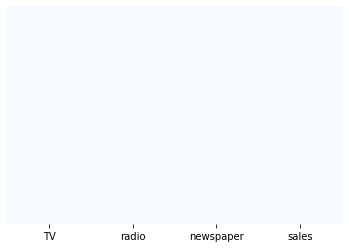

In [23]:
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'Blues' )

In [24]:
df.isnull().sum()# to get total values in column

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [26]:
df.columns

Index(['TV', 'radio', 'newspaper', 'sales'], dtype='object')

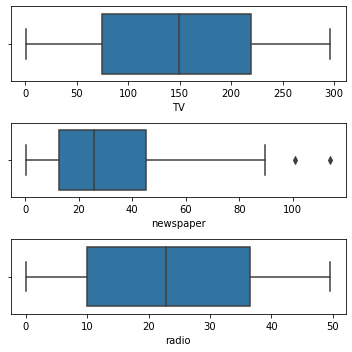

In [29]:
# Outlier Analysis

fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['radio'], ax = axs[2])
plt.tight_layout()

# Exploratory Data Analysis

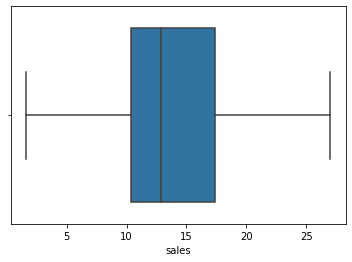

In [32]:
sns.boxplot(df['sales'])
plt.show()

    There is no outlier present in target Sales
    There is average sales of about 15,000 dollars

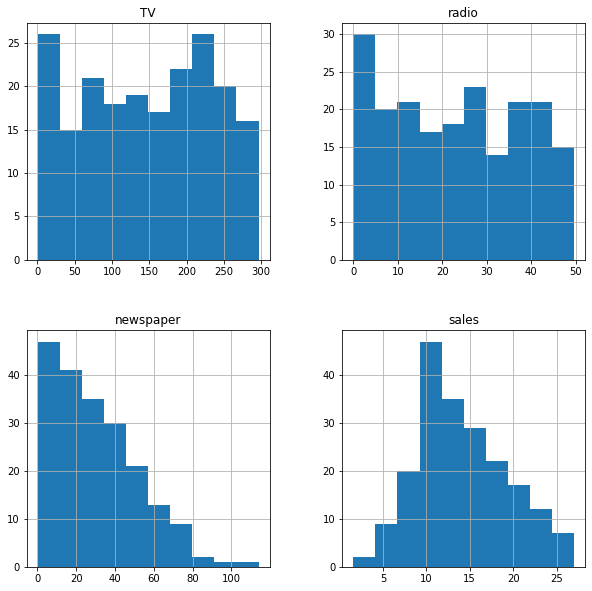

In [33]:
# to check all variables at once

df.hist( bins = 10, figsize = (10,10))
plt.show()

    # Spending budget for advertisments on TV is in all range, same for Radio but less than TV. But on newspapers, less budget is spend

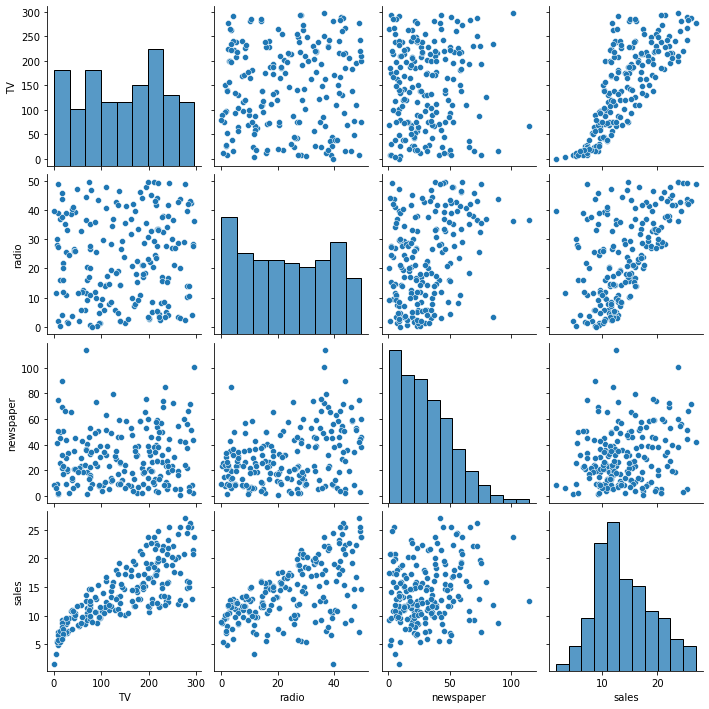

In [34]:
sns.pairplot(df, size=2.5)
plt.show()

<AxesSubplot:>

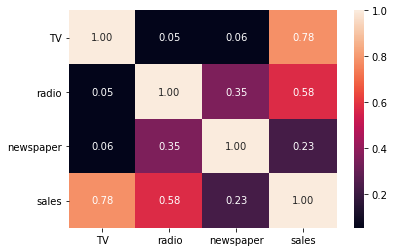

In [35]:
# Calculate correlations
corr = df.corr()
 
# Heatmap
sns.heatmap(corr,  annot=True, fmt=".2f")

# Data Preprocessing

In [36]:
### Define X&Y ###

X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Splitting Datase

In [37]:
### Splitting Dataset ###

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 42)

# Model Training

In [38]:
### Simple Linear Regression/ Multiple Linear Regression ###

from sklearn.linear_model import LinearRegression
regressor = LinearRegression( fit_intercept = True)

regressor.fit(X_train, y_train)

LinearRegression()

In [39]:
print(f"Linear coefficients : {regressor.coef_}")
print(f"Intercept : {regressor.intercept_}")

Linear coefficients : [0.04472952 0.18919505 0.00276111]
Intercept : 2.979067338122631


In [40]:
y_pred = regressor.predict(X_test)

# Metrices

In [41]:
### RMSE ###

from sklearn import metrics
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Root Mean Squared Error: 1.7815996615334497


In [42]:
### R-squared ###

from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.899438024100912

# Tuning

In [43]:
import statsmodels.api as sm

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 17 Jan 2022   Prob (F-statistic):           1.58e-96
Time:                        12:08:32   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

In [48]:
X = df['TV']
y = df['sales']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [50]:
# Add a constant to get an intercept
X_train_sm = sm.add_constant(X_train)

# Fit the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

In [51]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.989666
TV       0.046497
dtype: float64

In [55]:
# Sales=6.948+0.054×TV

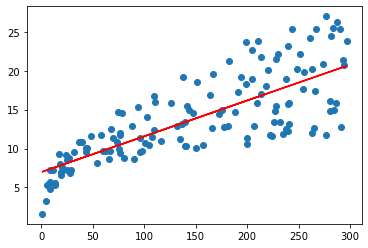

In [53]:
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.98 + 0.046*X_train, 'r')
plt.show()

# Model Evaluation


In [56]:
y_train_pred = lr.predict(X_train_sm)
res = (y_train - y_train_pred)

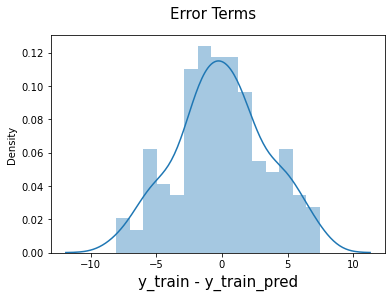

In [57]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)                  # Plot heading 
plt.xlabel('y_train - y_train_pred', fontsize = 15)         # X-label
plt.show()

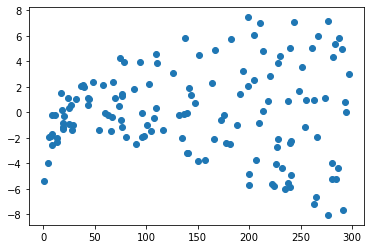

In [58]:
# Looking for patterns in the residuals
plt.scatter(X_train,res)
plt.show()

# Predictions on the Test Set


In [59]:
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predict the y values corresponding to X_test_sm
y_pred = lr.predict(X_test_sm)
y_pred.head()

126     7.352345
104    18.065337
99     13.276109
92     17.112141
111    18.228077
dtype: float64

In [61]:
from sklearn.metrics import mean_squared_error
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

2.8241456288327003

In [62]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.5942987267783303

# Visualizing the fit on the test set

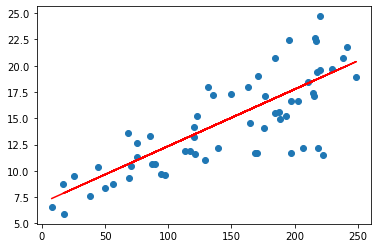

In [63]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()